In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ecommerce (2).csv")

In [3]:
df.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           623 non-null    int64  
 1   Avg Session length    623 non-null    float64
 2   Time on App           623 non-null    float64
 3   Time on Website       623 non-null    float64
 4   Length of MemberShip  623 non-null    float64
 5   Yealy amount spent    623 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 29.3 KB


In [5]:
df.describe()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,312.000000,33.039429,12.001459,37.079018,3.514850,499.600023
std,179.988889,0.949071,0.996609,0.991753,0.948063,80.032965
min,1.000000,29.972300,9.273248,33.751071,0.891398,256.670000
25%,156.500000,32.375680,11.334163,36.376725,2.906558,447.665160
50%,312.000000,33.044399,11.998823,37.113631,3.504771,498.806136
75%,467.500000,33.700947,12.647695,37.773880,4.140305,551.257208
max,623.000000,35.744415,15.138317,40.808388,6.553916,775.337626


In [6]:
df.mean()

Customer ID             312.000000
Avg Session length       33.039429
Time on App              12.001459
Time on Website          37.079018
Length of MemberShip      3.514850
Yealy amount spent      499.600023
dtype: float64

In [7]:
df.median()

Customer ID             312.000000
Avg Session length       33.044399
Time on App              11.998823
Time on Website          37.113631
Length of MemberShip      3.504771
Yealy amount spent      498.806136
dtype: float64

In [8]:
df.isna().sum()

Customer ID             0
Avg Session length      0
Time on App             0
Time on Website         0
Length of MemberShip    0
Yealy amount spent      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.rename({"Yealy amount spent":"Yearly amount spent"}, axis=1)

In [11]:
df.head(2)

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yearly amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955


In [12]:
df.corr()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yearly amount spent
Customer ID,1.000000,-0.036917,-0.001085,0.009227,0.052600,-0.075175
Avg Session length,-0.036917,1.000000,-0.001234,0.050231,-0.010919,-0.042764
Time on App,-0.001085,-0.001234,1.000000,0.040029,0.029839,-0.012348
Time on Website,0.009227,0.050231,0.040029,1.000000,0.036788,0.084305
Length of MemberShip,0.052600,-0.010919,0.029839,0.036788,1.000000,-0.030451
Yearly amount spent,-0.075175,-0.042764,-0.012348,0.084305,-0.030451,1.000000


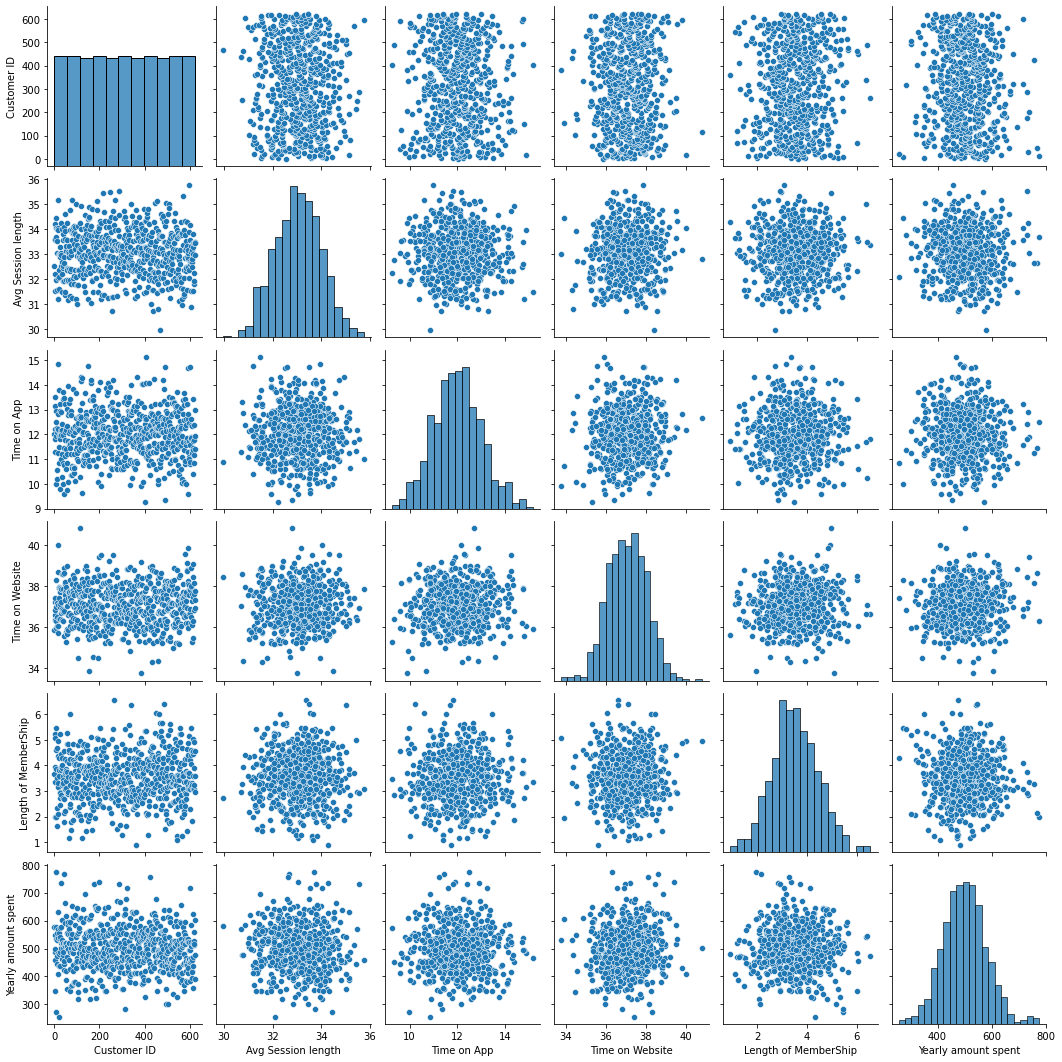

In [13]:
sns.pairplot(df)

### PREPARING A MODEL

In [14]:
import statsmodels.api as smf

In [15]:
X = df.iloc[:,1:5]

In [16]:
Y = df.iloc[:,5]

In [17]:
X.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip
0,32.538350,12.028846,35.850540,3.648854
1,34.206718,12.226851,37.246443,1.987536
2,31.535240,11.814341,36.610697,3.351191
3,32.199577,11.295163,37.425695,5.234337
4,33.570137,13.500972,36.856165,3.938603


In [18]:
Y.head()

0    576.098273
1    460.784955
2    349.739791
3    547.709921
4    487.055641
Name: Yearly amount spent, dtype: float64

In [19]:
X = smf.add_constant(X)

In [20]:
model = smf.OLS(Y,X).fit()

In [21]:
model.rsquared

0.010712687572176138

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly amount spent   R-squared:                       0.011
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     1.673
Date:                 Mon, 06 Feb 2023   Prob (F-statistic):              0.155
Time:                         15:54:14   Log-Likelihood:                -3610.4
No. Observations:                  623   AIC:                             7231.
Df Residuals:                      618   BIC:                             7253.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  391.7199    163.462      2.396      0.017      70.712     712.728
Avg Session length      -4.0138      3.378     -1.188      0.235     -10.649       2.621
Time on App             -1.2000      3.217     -0.373      0.709      -7.517       5.117
Time on Website          7.1447      3.238      2.207      0.028       0.787      13.503
Length of MemberShip    -2.8518      3.381     -0.843      0.399      -9.492       3.789
==============================================================================
Omnibus:                        7.992   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.525
Skew:                           0.208   Prob(JB):                       0.0141
Kurtosis:                       3.393   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
import statsmodels.formula.api as smf

In [24]:
model = smf.ols('df.iloc[:,5]~df.iloc[:,1:5]',data=df).fit()

In [25]:
model.rsquared

0.010712687572176027

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          df.iloc[:, 5]   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.673
Date:                Mon, 06 Feb 2023   Prob (F-statistic):              0.155
Time:                        15:55:08   Log-Likelihood:                -3610.4
No. Observations:                 623   AIC:                             7231.
Df Residuals:                     618   BIC:                             7253.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            391.7199    163.462      2.396      0.017      70.712     712.728
df.iloc[:, 1:5][0]    -4.0138      3.378     -1.188      0.235     -10.649       2.621
df.iloc[:, 1:5][1]    -1.2000      3.217     -0.373      0.709      -7.517       5.117
df.iloc[:, 1:5][2]     7.1447      3.238      2.207      0.028       0.787      13.503
df.iloc[:, 1:5][3]    -2.8518      3.381     -0.843      0.399      -9.492       3.789
==============================================================================
Omnibus:                        7.992   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.525
Skew:                           0.208   Prob(JB):                       0.0141
Kurtosis:                       3.393   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### CALCULATING VIF

In [27]:
rsq_col1 = smf.ols('df.iloc[:,1]~df.iloc[:,[2,3,4]]',data=df).fit().rsquared
vif_col1 = 1/(1-rsq_col1)

rsq_col2 = smf.ols('df.iloc[:,2]~df.iloc[:,[1,3,4]]',data=df).fit().rsquared
vif_col2 = 1/(1-rsq_col2)

rsq_col3 = smf.ols('df.iloc[:,3]~df.iloc[:,[1,2,4]]',data=df).fit().rsquared
vif_col3 = 1/(1-rsq_col3)

rsq_col4 = smf.ols('df.iloc[:,4]~df.iloc[:,[1,2,3]]',data=df).fit().rsquared
vif_col4 = 1/(1-rsq_col4)


d1 = {'Variables':['Avg Session length','Time on App','Time on Website','Length of MemberShip'], 'VIF':[vif_col1,vif_col2,vif_col3,vif_col4]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Avg Session length,1.002702
1,Time on App,1.002422
2,Time on Website,1.005468
3,Length of MemberShip,1.002326


## DT REGRESSION

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import math

In [29]:
df.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yearly amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


In [30]:
array = df.values
X = array[:,1:5]
Y = array[:,5]

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 2)

In [32]:
model = DecisionTreeRegressor(max_depth = 3, min_samples_split = 5)
model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=5)

In [33]:
pred = model.predict(X_test)
mse = metrics.mean_squared_error(Y_test, pred)
mse                      # mse = mean square error

5193.74771020826

In [34]:
rmse = math.sqrt(mse)
rmse                     # rmse = root mean square error

72.06766064059704

In [35]:
metrics.mean_absolute_percentage_error(Y_test, pred)

0.11348415089308458

[Text(0.5, 0.875, 'X[2] <= 36.742\nsquared_error = 6621.343\nsamples = 498\nvalue = 499.122'),
 Text(0.25, 0.625, 'X[3] <= 1.981\nsquared_error = 6103.481\nsamples = 178\nvalue = 484.938'),
 Text(0.125, 0.375, 'X[3] <= 1.953\nsquared_error = 10640.405\nsamples = 9\nvalue = 537.235'),
 Text(0.0625, 0.125, 'squared_error = 3997.998\nsamples = 8\nvalue = 507.472'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 775.338'),
 Text(0.375, 0.375, 'X[3] <= 2.392\nsquared_error = 5708.468\nsamples = 169\nvalue = 482.153'),
 Text(0.3125, 0.125, 'squared_error = 5337.321\nsamples = 11\nvalue = 431.673'),
 Text(0.4375, 0.125, 'squared_error = 5544.543\nsamples = 158\nvalue = 485.668'),
 Text(0.75, 0.625, 'X[3] <= 5.137\nsquared_error = 6735.259\nsamples = 320\nvalue = 507.011'),
 Text(0.625, 0.375, 'X[3] <= 2.083\nsquared_error = 6430.037\nsamples = 306\nvalue = 509.719'),
 Text(0.5625, 0.125, 'squared_error = 4585.131\nsamples = 16\nvalue = 468.124'),
 Text(0.6875, 0.125, 'squared

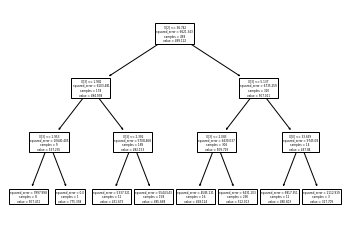

In [36]:
tree.plot_tree(model)

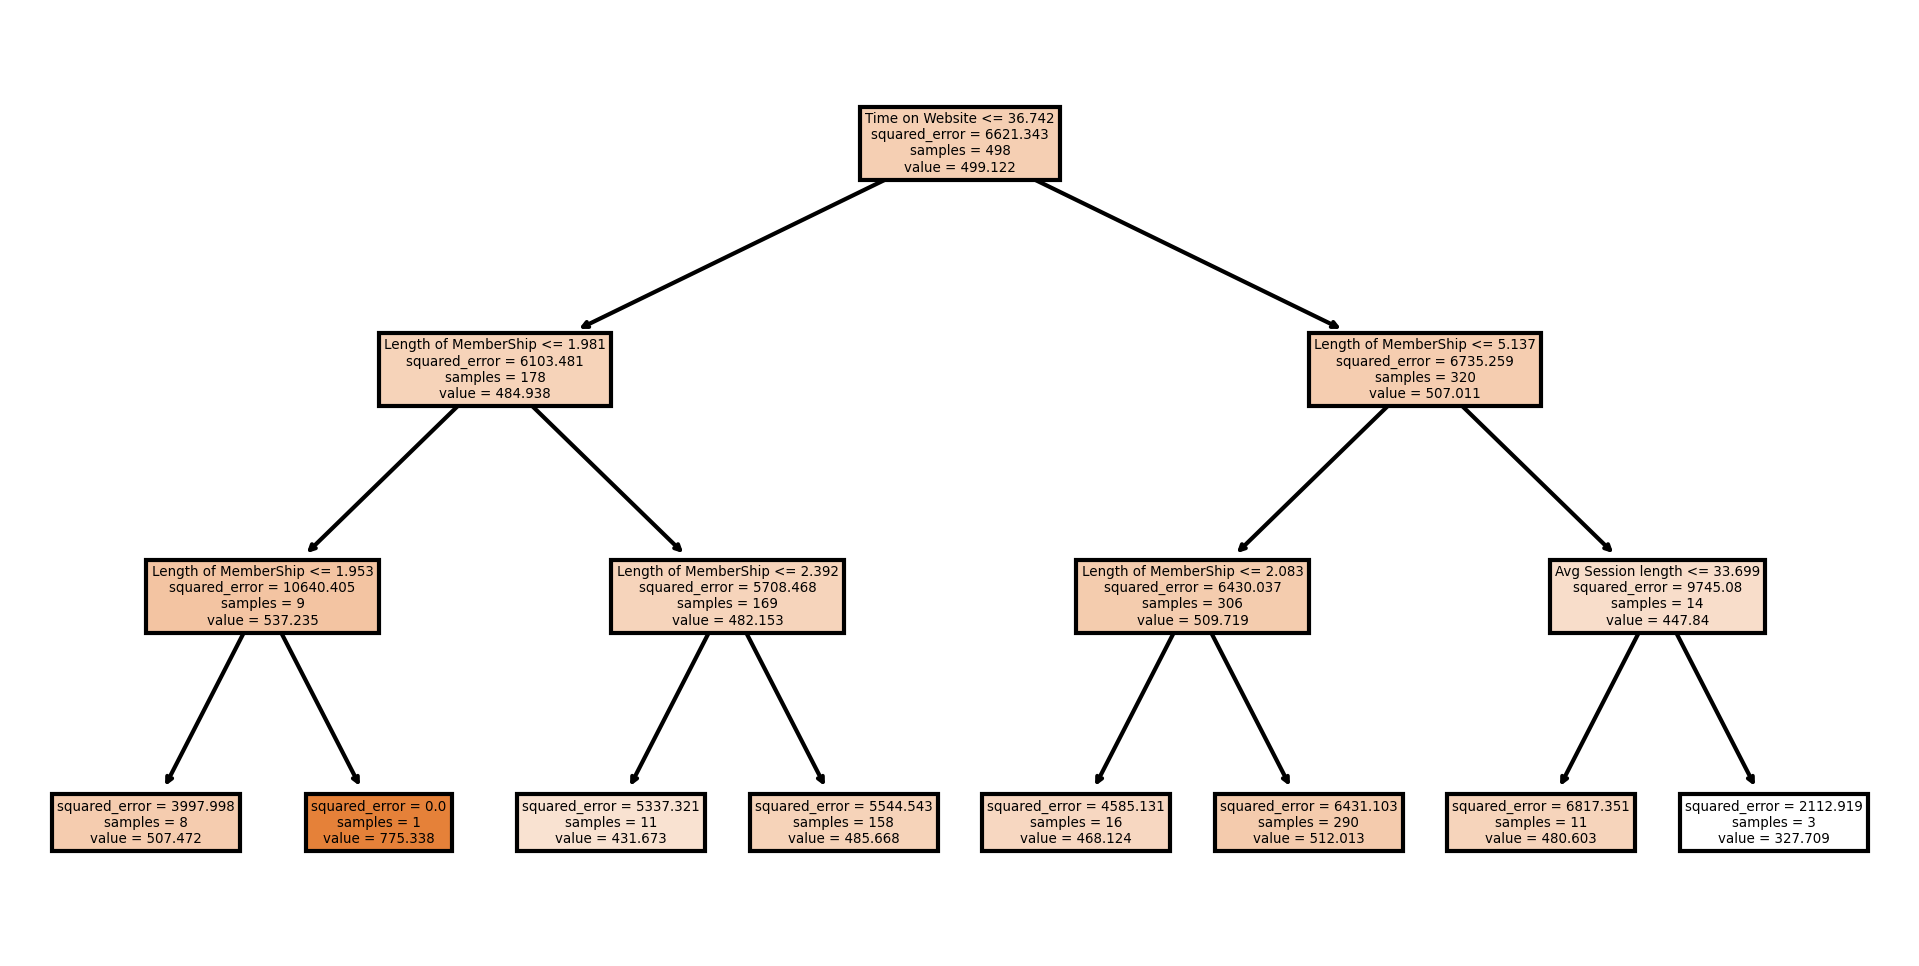

In [37]:
fn = ['Avg Session length','Time on App','Time on Website','Length of MemberShip']
cn = ['Yearly amount spent']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

## KNN REGRESSION

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [160]:
df = pd.read_csv("Ecommerce (2).csv")

In [161]:
df.head(2)

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955


In [162]:
X = df.iloc[:,1:5]
Y = df.iloc[:,5]

In [163]:
#X = (X-X.min())/(X.max()-X.min())

In [164]:
#Y = (Y-Y.min())/(Y.max()-Y.min())

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 2)

In [167]:
model = KNeighborsRegressor()
model.fit(X_train, Y_train)

KNeighborsRegressor()

In [168]:
rmse_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k =' , K , 'is:', error)

RMSE value for k = 1 is: 113.14756840321881
RMSE value for k = 2 is: 92.3975890710883
RMSE value for k = 3 is: 88.08555270016052
RMSE value for k = 4 is: 83.63755245965834
RMSE value for k = 5 is: 82.98405565315296
RMSE value for k = 6 is: 80.34084933740421
RMSE value for k = 7 is: 79.95627767983851
RMSE value for k = 8 is: 79.53474133693355
RMSE value for k = 9 is: 79.84207072830567
RMSE value for k = 10 is: 79.81256504811832
RMSE value for k = 11 is: 79.56806832003204
RMSE value for k = 12 is: 78.50703183546108
RMSE value for k = 13 is: 77.91236517202928
RMSE value for k = 14 is: 77.04281439373456
RMSE value for k = 15 is: 76.76408455799489
RMSE value for k = 16 is: 76.55228870462801
RMSE value for k = 17 is: 76.23771829300044
RMSE value for k = 18 is: 76.57729530232237
RMSE value for k = 19 is: 76.20055254516946
RMSE value for k = 20 is: 75.85948676596243


In [169]:
metrics.mean_absolute_percentage_error(Y_test, pred)

0.12150191337347471

### GRID SEARCH

In [170]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [171]:
params = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19]}

In [172]:
knn = neighbors.KNeighborsRegressor()

In [173]:
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, Y_train)
model.best_params_

{'n_neighbors': 19}

In [174]:
model.best_score_

-0.041997220296342744

### CROSS VALIDATION

In [175]:
kfold    = KFold(n_splits=10)

In [183]:
model    = KNeighborsRegressor(n_neighbors=19)
results  = cross_val_score(model, X_train, Y_train, cv =kfold)

In [184]:
results

array([ 0.07334768, -0.05616415, -0.04074599, -0.04385077, -0.06060176,
       -0.05223683,  0.01159952, -0.2077862 , -0.1789617 , -0.21053714])

In [185]:
results.mean()

-0.07659373278053051